In [1]:
import os
import json
import string
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords

In [8]:
# We'll process just one article for illustration
#open the JSON data file from your current working directory
data =  open("Article_1.json", "r")

In [9]:
# Load in the JSON object in the file
jdata = json.load(data)
jdata

{'Text': 'Gluten, it turns out, is not an actual grain or visible ingredient but the substance, made of two proteins, that gives dough its elasticity. Celiac is an autoimmune disorder in which gluten wreaks havoc on the small intestine, blocking other nutrients from being absorbed. When I was diagnosed with celiac, my doctor taught me to pinpoint wheaty assassins lurking in foods you’d never suspect: soy sauce, gravy, candy bars. Back then, the crunchiest health food store in my hometown was the only place where you could find wheat-free products. My mom and I would go there to eat terrible sandwiches in a tiny café in the back that was decorated like a ’70s rainforest, beaded curtains strung alongside fake agave plants. It was always empty. The wild-haired store owner would emerge from the kitchen with her hands full of rolls.\n\nAs someone who once mail-ordered a frozen pack of sorghum donuts to my dorm room, I’ve found the gluten-free boom weird to live through. I went from feeling 

In [10]:
# Extract the URL and the Text from within the JSON object
url=jdata['URL']
url

'http://www.slate.com/articles/life/food/2015/08/i_was_gluten_free_before_it_was_cool_diagnosed_with_celiac_in_the_1990s.html'

In [12]:
text=jdata['Text']
text

'Gluten, it turns out, is not an actual grain or visible ingredient but the substance, made of two proteins, that gives dough its elasticity. Celiac is an autoimmune disorder in which gluten wreaks havoc on the small intestine, blocking other nutrients from being absorbed. When I was diagnosed with celiac, my doctor taught me to pinpoint wheaty assassins lurking in foods you’d never suspect: soy sauce, gravy, candy bars. Back then, the crunchiest health food store in my hometown was the only place where you could find wheat-free products. My mom and I would go there to eat terrible sandwiches in a tiny café in the back that was decorated like a ’70s rainforest, beaded curtains strung alongside fake agave plants. It was always empty. The wild-haired store owner would emerge from the kitchen with her hands full of rolls.\n\nAs someone who once mail-ordered a frozen pack of sorghum donuts to my dorm room, I’ve found the gluten-free boom weird to live through. I went from feeling mildly ex

In [13]:
print(type(text))
print(len(text))
print(text[9300:])

<class 'str'>
9336
 offer a sympathetic little grimace.


In [14]:
# Convert the free text into tokens
tokens = word_tokenize(text)
type(tokens)

list

In [15]:
# A little exploration: How many words in this article? How many unique words?
# Any single character words?
len(tokens)

1855

In [18]:
tokens[:20]
unique = set(tokens)
unique

{'(',
 ')',
 ',',
 '.',
 '/',
 '100',
 '140',
 '1995',
 '2',
 '2012',
 '2013',
 '2014',
 '2019',
 '59',
 '60',
 '70s',
 '9',
 '9-year-old',
 '9-year-olds',
 ':',
 ';',
 '?',
 'A',
 'After',
 'All',
 'Along',
 'Also',
 'America',
 'American',
 'And',
 'Apatovian',
 'Are',
 'As',
 'At',
 'Atkins',
 'Back',
 'Baruchel',
 'Bennett',
 'Billboard',
 'But',
 'Caesar',
 'Celiac',
 'Cinnamon',
 'Crunch',
 'Do',
 'Ebola',
 'End',
 'For',
 'Free',
 'GIs',
 'Gluten',
 'Gluten-free',
 'He',
 'Her',
 'Hot',
 'I',
 'If',
 'In',
 'Is',
 'It',
 'Italian',
 'Jay',
 'Larson-Walker',
 'Laura',
 'Let',
 'Lisa',
 'Maybe',
 'Museum',
 'My',
 'No',
 'Not',
 'Now',
 'O.G',
 'Park',
 'Photo',
 'Photoshopping',
 'Put',
 'Rogen',
 'Seth',
 'South',
 'SpaghettiOs',
 'Tastykakes',
 'That',
 'The',
 'Then',
 'This',
 'To',
 'Toast',
 'Tumblr',
 'Twix',
 'We',
 'Well',
 'What',
 'When',
 'Whereas',
 'Why',
 'With',
 'Worcestershire',
 'You',
 'a',
 'about',
 'absence',
 'absorbed',
 'absurdity',
 'across',
 'actual',

In [19]:
len(unique)

815

In [20]:
len(tokens)/len(unique)

2.276073619631902

In [21]:
sorted(unique)[:30]

['(',
 ')',
 ',',
 '.',
 '/',
 '100',
 '140',
 '1995',
 '2',
 '2012',
 '2013',
 '2014',
 '2019',
 '59',
 '60',
 '70s',
 '9',
 '9-year-old',
 '9-year-olds',
 ':',
 ';',
 '?',
 'A',
 'After',
 'All',
 'Along',
 'Also',
 'America',
 'American',
 'And']

In [22]:
single=[w for w in unique if len(w) == 1 ]

In [23]:
len(single)

20

In [24]:
single

['”',
 ')',
 'd',
 'm',
 ';',
 '9',
 's',
 '(',
 '/',
 'I',
 'a',
 ',',
 ':',
 '2',
 'A',
 '?',
 't',
 '’',
 '“',
 '.']

In [25]:
# Frequency distribution of the words
tokens.count('gluten')

18

In [26]:
fd = nltk.FreqDist(tokens)
fd

In [27]:
fd.most_common(50)

[('.', 76),
 (',', 75),
 ('the', 65),
 ('a', 58),
 ('of', 47),
 ('to', 39),
 ('I', 37),
 ('in', 29),
 ('and', 28),
 ('my', 25),
 ('’', 23),
 ('“', 23),
 ('”', 23),
 ('gluten', 18),
 ('was', 18),
 ('that', 17),
 ('it', 16),
 ('with', 13),
 ('you', 13),
 ('from', 10),
 ('me', 10),
 ('like', 10),
 ('as', 10),
 ('had', 10),
 ('your', 10),
 ('when', 9),
 ('s', 9),
 ('at', 9),
 ('food', 8),
 ('?', 8),
 ('by', 8),
 ('is', 7),
 ('an', 7),
 ('for', 7),
 ('or', 6),
 ('on', 6),
 ('gluten-free', 6),
 ('this', 6),
 ('into', 6),
 ('t', 6),
 ('Gluten', 5),
 (':', 5),
 ('would', 5),
 ('The', 5),
 ('one', 5),
 ('more', 5),
 ('percent', 5),
 ('A', 5),
 ('so', 5),
 ('they', 5)]

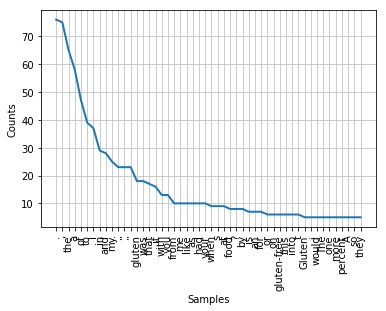

In [28]:
fd.plot(50)

In [29]:
# How long are the words?
fd_wlen = nltk.FreqDist([len(w) for w in unique])
fd_wlen

FreqDist({1: 20,
          2: 38,
          3: 79,
          4: 133,
          5: 120,
          6: 110,
          7: 98,
          8: 69,
          9: 49,
          10: 37,
          11: 28,
          12: 12,
          13: 12,
          14: 6,
          15: 1,
          16: 1,
          20: 1,
          21: 1})

In [30]:
# What about bigrams and trigrams?
bigr = nltk.bigrams(tokens[:10])

In [31]:
trigr = nltk.trigrams(tokens[:10])

In [32]:
tokens[:10]

['Gluten', ',', 'it', 'turns', 'out', ',', 'is', 'not', 'an', 'actual']

In [33]:
list(bigr)

[('Gluten', ','),
 (',', 'it'),
 ('it', 'turns'),
 ('turns', 'out'),
 ('out', ','),
 (',', 'is'),
 ('is', 'not'),
 ('not', 'an'),
 ('an', 'actual')]

In [ ]:
list(trigr)

In [50]:
# Back to text preprocessing: remove punctuations
tokens_nop = [ t for t in tokens if t not in y ]

1681

In [51]:
print(tokens[:50])

['Gluten', ',', 'it', 'turns', 'out', ',', 'is', 'not', 'an', 'actual', 'grain', 'or', 'visible', 'ingredient', 'but', 'the', 'substance', ',', 'made', 'of', 'two', 'proteins', ',', 'that', 'gives', 'dough', 'its', 'elasticity', '.', 'Celiac', 'is', 'an', 'autoimmune', 'disorder', 'in', 'which', 'gluten', 'wreaks', 'havoc', 'on', 'the', 'small', 'intestine', ',', 'blocking', 'other', 'nutrients', 'from', 'being', 'absorbed']


In [52]:
print(tokens_nop[:50])

['Gluten', 'it', 'turns', 'out', 'is', 'not', 'an', 'actual', 'grain', 'or', 'visible', 'ingredient', 'but', 'the', 'substance', 'made', 'of', 'two', 'proteins', 'that', 'gives', 'dough', 'its', 'elasticity', 'Celiac', 'is', 'an', 'autoimmune', 'disorder', 'in', 'which', 'gluten', 'wreaks', 'havoc', 'on', 'the', 'small', 'intestine', 'blocking', 'other', 'nutrients', 'from', 'being', 'absorbed', 'When', 'I', 'was', 'diagnosed', 'with', 'celiac']


In [53]:
len(tokens)

1855

In [54]:
len(tokens_nop)

1681

In [55]:
len(set(tokens_nop))

807

In [15]:
# Convert all characters to Lower case
tokens_lower=[ t.lower() for t in tokens_nop ]
y="sindhu"
y.lower()

NameError: name 'tokens_nop' is not defined

In [58]:
print(tokens_lower[:50])

['gluten', 'it', 'turns', 'out', 'is', 'not', 'an', 'actual', 'grain', 'or', 'visible', 'ingredient', 'but', 'the', 'substance', 'made', 'of', 'two', 'proteins', 'that', 'gives', 'dough', 'its', 'elasticity', 'celiac', 'is', 'an', 'autoimmune', 'disorder', 'in', 'which', 'gluten', 'wreaks', 'havoc', 'on', 'the', 'small', 'intestine', 'blocking', 'other', 'nutrients', 'from', 'being', 'absorbed', 'when', 'i', 'was', 'diagnosed', 'with', 'celiac']


In [59]:
len(set(tokens_lower))

770

In [60]:
# Create a stopword list from the standard list of stopwords available in nltk
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [61]:
# Remove all these stopwords from the text
tokens_nostop=[ t for t in tokens_lower if t not in stop ]

In [62]:
print(tokens_nostop[:50])

['gluten', 'turns', 'actual', 'grain', 'visible', 'ingredient', 'substance', 'made', 'two', 'proteins', 'gives', 'dough', 'elasticity', 'celiac', 'autoimmune', 'disorder', 'gluten', 'wreaks', 'havoc', 'small', 'intestine', 'blocking', 'nutrients', 'absorbed', 'diagnosed', 'celiac', 'doctor', 'taught', 'pinpoint', 'wheaty', 'assassins', 'lurking', 'foods', '’', 'never', 'suspect', 'soy', 'sauce', 'gravy', 'candy', 'bars', 'back', 'crunchiest', 'health', 'food', 'store', 'hometown', 'place', 'could', 'find']


In [63]:
len(tokens_lower)

1681

In [64]:
len(tokens_nostop)

926

In [65]:
FreqDist(tokens_nostop).most_common(50)

[('gluten', 23),
 ('’', 23),
 ('“', 23),
 ('”', 23),
 ('like', 10),
 ('food', 8),
 ('gluten-free', 7),
 ('celiac', 5),
 ('would', 5),
 ('one', 5),
 ('percent', 5),
 ('first', 5),
 ('eat', 4),
 ('heard', 4),
 ('word', 4),
 ('way', 4),
 ('asked', 4),
 ('maybe', 4),
 ('made', 3),
 ('small', 3),
 ('doctor', 3),
 ('never', 3),
 ('could', 3),
 ('mom', 3),
 ('tiny', 3),
 ('also', 3),
 ('wheat', 3),
 ('allergies', 3),
 ('years', 3),
 ('much', 3),
 ('waiters', 3),
 ('still', 3),
 ('something', 3),
 ('two', 2),
 ('gives', 2),
 ('diagnosed', 2),
 ('sauce', 2),
 ('back', 2),
 ('health', 2),
 ('store', 2),
 ('find', 2),
 ('products', 2),
 ('kitchen', 2),
 ('found', 2),
 ('went', 2),
 ('feeling', 2),
 ('saying', 2),
 ('comes', 2),
 ('2014', 2),
 ('2013', 2)]

In [68]:
# Now, let's do some Stemming!
# There are different stemmers available in Python. Let's take a look at a few

# The most popular stemmer
porter = nltk.PorterStemmer()


nltk.stem.porter.PorterStemmer

In [66]:
)
tokens_porter=[ porter.stem(t) for t in tokens_nostop ] 

In [67]:
print(tokens_nostop[:50])

['gluten', 'turns', 'actual', 'grain', 'visible', 'ingredient', 'substance', 'made', 'two', 'proteins', 'gives', 'dough', 'elasticity', 'celiac', 'autoimmune', 'disorder', 'gluten', 'wreaks', 'havoc', 'small', 'intestine', 'blocking', 'nutrients', 'absorbed', 'diagnosed', 'celiac', 'doctor', 'taught', 'pinpoint', 'wheaty', 'assassins', 'lurking', 'foods', '’', 'never', 'suspect', 'soy', 'sauce', 'gravy', 'candy', 'bars', 'back', 'crunchiest', 'health', 'food', 'store', 'hometown', 'place', 'could', 'find']


In [69]:
print(tokens_porter[:50])

['gluten', 'turn', 'actual', 'grain', 'visibl', 'ingredi', 'substanc', 'made', 'two', 'protein', 'give', 'dough', 'elast', 'celiac', 'autoimmun', 'disord', 'gluten', 'wreak', 'havoc', 'small', 'intestin', 'block', 'nutrient', 'absorb', 'diagnos', 'celiac', 'doctor', 'taught', 'pinpoint', 'wheati', 'assassin', 'lurk', 'food', '’', 'never', 'suspect', 'soy', 'sauc', 'gravi', 'candi', 'bar', 'back', 'crunchiest', 'health', 'food', 'store', 'hometown', 'place', 'could', 'find']


In [73]:
# The Lancaster Stemmer - developed at Lancaster University
lancaster = nltk.LancasterStemmer()
tokens_lanc = [ lancaster.stem(t) for t in tokens_nostop ] 
print(tokens_lanc[:50])
len(tokens_lanc)

['glut', 'turn', 'act', 'grain', 'vis', 'ingredy', 'subst', 'mad', 'two', 'protein', 'giv', 'dough', 'elast', 'celiac', 'autoimmun', 'disord', 'glut', 'wreak', 'havoc', 'smal', 'intestin', 'block', 'nutry', 'absorb', 'diagnos', 'celiac', 'doct', 'taught', 'pinpoint', 'wheaty', 'assassin', 'lurk', 'food', '’', 'nev', 'suspect', 'soy', 'sauc', 'gravy', 'candy', 'bar', 'back', 'crunchiest', 'heal', 'food', 'stor', 'hometown', 'plac', 'could', 'find']


926

In [71]:
# The snowball stemmer -  which supports 13 non-English languages as well!

snowball = nltk.SnowballStemmer('english')
tokens_snow = [ snowball.stem(t) for t in tokens_nostop ]
print(tokens_snow[:50])


['gluten', 'turn', 'actual', 'grain', 'visibl', 'ingredi', 'substanc', 'made', 'two', 'protein', 'give', 'dough', 'elast', 'celiac', 'autoimmun', 'disord', 'gluten', 'wreak', 'havoc', 'small', 'intestin', 'block', 'nutrient', 'absorb', 'diagnos', 'celiac', 'doctor', 'taught', 'pinpoint', 'wheati', 'assassin', 'lurk', 'food', '’', 'never', 'suspect', 'soy', 'sauc', 'gravi', 'candi', 'bar', 'back', 'crunchiest', 'health', 'food', 'store', 'hometown', 'place', 'could', 'find']


In [72]:
len(set(tokens_snow))

627

In [74]:
# Now, for Lemmatization, which converts each word to it's corresponding lemma, use the Lemmatizer provided by nltk
wnl = nltk.WordNetLemmatizer()
tokens_lem = [ wnl.lemmatize(t) for t in tokens_nostop ]
print(tokens_lem[:50])
len(set(tokens_lem))

['gluten', 'turn', 'actual', 'grain', 'visible', 'ingredient', 'substance', 'made', 'two', 'protein', 'give', 'dough', 'elasticity', 'celiac', 'autoimmune', 'disorder', 'gluten', 'wreaks', 'havoc', 'small', 'intestine', 'blocking', 'nutrient', 'absorbed', 'diagnosed', 'celiac', 'doctor', 'taught', 'pinpoint', 'wheaty', 'assassin', 'lurking', 'food', '’', 'never', 'suspect', 'soy', 'sauce', 'gravy', 'candy', 'bar', 'back', 'crunchiest', 'health', 'food', 'store', 'hometown', 'place', 'could', 'find']


650

In [75]:
# Check the lemmatization results. Why are some words not lemmatized?
# The reason is it needs to know the POS of the words. The default is 'n'.
# We'll learn how to do POS tagging later.
wnl.lemmatize('absorbed', pos = 'v')

'absorb'

In [76]:
# Let's use Snowball Stemmer's result.
# Further cleaning: filter off anything with less than 3 characters
nltk.FreqDist(tokens_snow).most_common(100)
tokens_clean = [ t for t in tokens_snow if len(t) >= 3 ]

In [77]:
len(tokens_snow)

926

In [78]:
len(tokens_clean)

850

In [79]:
nltk.FreqDist(tokens_clean).most_common(50)

[('gluten', 23),
 ('like', 10),
 ('food', 9),
 ('gluten-fre', 7),
 ('ask', 6),
 ('celiac', 5),
 ('would', 5),
 ('one', 5),
 ('percent', 5),
 ('first', 5),
 ('way', 5),
 ('allergi', 5),
 ('waiter', 5),
 ('eat', 4),
 ('heard', 4),
 ('word', 4),
 ('year', 4),
 ('mayb', 4),
 ('turn', 3),
 ('ingredi', 3),
 ('made', 3),
 ('small', 3),
 ('doctor', 3),
 ('never', 3),
 ('could', 3),
 ('mom', 3),
 ('sandwich', 3),
 ('tini', 3),
 ('feel', 3),
 ('diet', 3),
 ('say', 3),
 ('question', 3),
 ('also', 3),
 ('wheat', 3),
 ('line', 3),
 ('much', 3),
 ('still', 3),
 ('someth', 3),
 ('know', 3),
 ('slight', 3),
 ('two', 2),
 ('protein', 2),
 ('give', 2),
 ('intestin', 2),
 ('diagnos', 2),
 ('sauc', 2),
 ('back', 2),
 ('health', 2),
 ('store', 2),
 ('find', 2)]

In [80]:
fd_clean = nltk.FreqDist(tokens_clean)

In [83]:
# Join the cleaned tokens back into a string.
# Why? Because some functions we'll use later require string as input.
text_clean=" ".join(tokens_clean)

'gluten.turn.actual.grain.visibl.ingredi.substanc.made.two.protein.give.dough.elast.celiac.autoimmun.disord.gluten.wreak.havoc.small.intestin.block.nutrient.absorb.diagnos.celiac.doctor.taught.pinpoint.wheati.assassin.lurk.food.never.suspect.soy.sauc.gravi.candi.bar.back.crunchiest.health.food.store.hometown.place.could.find.wheat-fre.product.mom.would.eat.terribl.sandwich.tini.café.back.decor.like.70s.rainforest.bead.curtain.strung.alongsid.fake.agav.plant.alway.empti.wild-hair.store.owner.would.emerg.kitchen.hand.full.roll.someon.mail-ord.frozen.pack.sorghum.donut.dorm.room.found.gluten-fre.boom.weird.live.went.feel.mild.exot.like.odd.domest.tropic.pet.unwit.embodi.whole.host.cliché.fad.diet.femal.calorie-phobia.reason.say.assert.primaci.great.war.gluten.lay.claim.o.g.status.come.ask.question.soup.thicken.roux.also.convey.uniqu.strang.feel.lifelong.trait—even.one.arbitrari.intoler.wheat.protein.hybrid—turn.punch.line.cultur.larg.golden.age.glutenless.gluten-fre.food.sale.grew.percent

In [85]:
# ==== Installation of wordcloud package
# 1. download wordcloud‑1.3.2‑cp36‑cp36m‑win_amd64.whl from http://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud 
# 2. Copy the file to your current working directory
# 3. Open command prompt from Tools
# 4. python -m pip install wordcloud-1.3.2-cp36-cp36m-win_amd64.whl
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [86]:
# 1. Simple cloud
# Generate a word cloud image
# Take note that this function requires text string as input
wc = WordCloud(background_color="white").generate(text_clean)

In [87]:
# Display the generated image:
# the matplotlib way:

plt.imshow(wc, interpolation='bilinear')

In [88]:
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

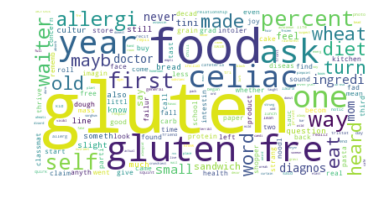

In [89]:
plt.show()

In [91]:
wc.to_file("example.png")

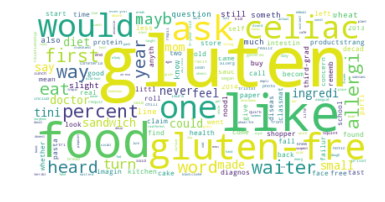

In [92]:
# We can also generate directly from the frequency information
wc2 = WordCloud(background_color="white")
wc2.generate_from_frequencies(fd_clean)
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [93]:
# 2. Cloud with customized shape and color
mask = np.array(Image.open("./fly.png"))
image_colors = ImageColorGenerator(mask)

In [94]:
wc3 = WordCloud(background_color='white', mask=mask).generate(text_clean)

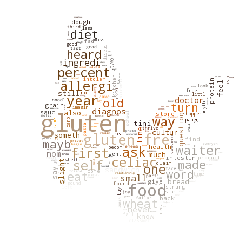

In [95]:
plt.imshow(wc3.recolor(color_func=image_colors))
plt.axis("off")
plt.show()